<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>    
</center>
<h1 align=center><font size = 5>Principal Component Analysis</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 28, 2024</font>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

We will load a very simple and popular dataset.

In [41]:
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

iris_data = pd.DataFrame(X, columns=features)
iris_data['target'] = y

In [42]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
iris_data.shape

(150, 5)

In [44]:
iris_data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Apply PCA Algorithm (Manually)

Step 1: Center/Standardize the data.

In [46]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Step 2: Calculate the covariance matrix.

In [47]:
cov_matrix = np.cov(X_normalized.T)
print("Covariance Matrix: \n", cov_matrix)

Covariance Matrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Step 3: Find the eigenvalues and eigenvectors.

In [48]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues: {}".format(eigenvalues))
print("Eigenvectors: \n", eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Step 4: Sort eigenvectors by eigenvalues in descending order.

In [49]:
sorted_indices = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

Visualize the cumulative sum of the eigenvalues.

In [50]:
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

In [51]:
x=[1,3,4,5]
print(np.cumsum(x))
print(np.sum(x))
print(np.cumsum(x)/np.sum(x))

[ 1  4  8 13]
13
[0.07692308 0.30769231 0.61538462 1.        ]


Step 5: Select top 2 principal components.

In [53]:
top_eigenvectors = eigenvectors[:, :2]
print(top_eigenvectors.shape)
X_pca = X_normalized.dot(top_eigenvectors)

(4, 2)


Visualize the data.

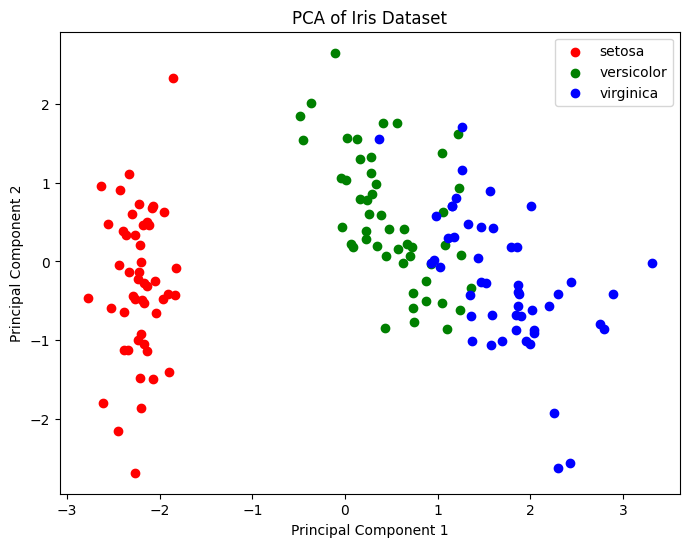

In [54]:
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)

plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Apply PCA (Scikit Learn)

In [55]:
no_components = iris_data.shape[1] - 1

Define an instance of PCA object.

In [56]:
pca = PCA(n_components=no_components, random_state=42)

Apply PCA algorithm.

In [57]:
X_pca = pca.fit_transform(X_normalized)

Get the eigenvalues and eignvectors.

In [58]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues: {}".format(eigenvalues))
print("Eigenvectors: \n", eigenvectors.T)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591  0.37741762  0.71956635 -0.26128628]
 [-0.26934744  0.92329566 -0.24438178  0.12350962]
 [ 0.5804131   0.02449161 -0.14212637  0.80144925]
 [ 0.56485654  0.06694199 -0.63427274 -0.52359713]]


Step 5: Select top 2 principal components

In [59]:
top_eigenvectors = eigenvectors[:, :2]
X_pca = X_normalized.dot(top_eigenvectors)

In [60]:
print(X_normalized.shape)
print(top_eigenvectors.shape)

(150, 4)
(4, 2)


In [61]:
X_pca

array([[-7.05398432e-01,  1.34849538e+00],
       [-1.26607290e+00,  3.51069520e-01],
       [-1.25948347e+00,  8.55311414e-01],
       [-1.32770363e+00,  6.47627932e-01],
       [-6.81654565e-01,  1.59367132e+00],
       [-1.14560300e-01,  2.09159090e+00],
       [-1.14235467e+00,  1.31539483e+00],
       [-8.14516894e-01,  1.15470193e+00],
       [-1.66863545e+00,  3.01711125e-01],
       [-1.10390060e+00,  5.33461323e-01],
       [-3.01330161e-01,  1.66177593e+00],
       [-8.99891489e-01,  1.20608441e+00],
       [-1.29481566e+00,  3.67447935e-01],
       [-1.73319280e+00,  5.72299310e-01],
       [ 8.91616716e-02,  2.21052003e+00],
       [ 4.27454015e-01,  3.08416057e+00],
       [-2.78153500e-01,  2.14715103e+00],
       [-7.39792116e-01,  1.36475323e+00],
       [ 2.23624112e-02,  1.76488462e+00],
       [-4.38252872e-01,  1.98848222e+00],
       [-4.80174505e-01,  9.96376846e-01],
       [-5.59526871e-01,  1.79220038e+00],
       [-1.09779355e+00,  1.77977647e+00],
       [-8.

Visualize the data.

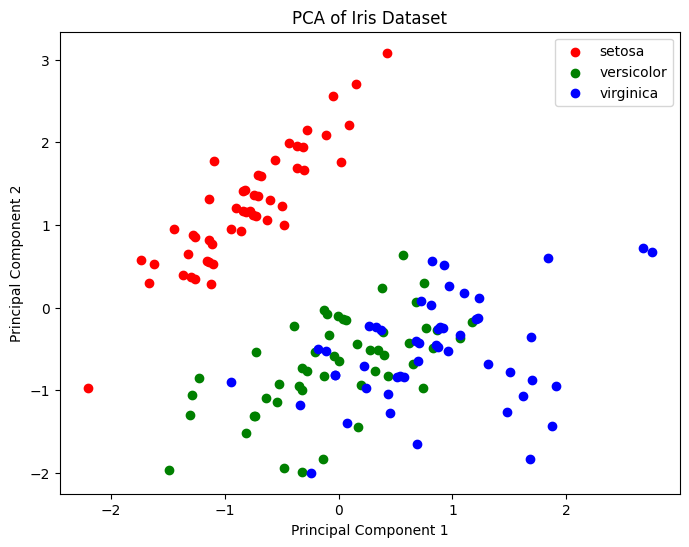

In [62]:
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label)

plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Applying PCA to Machine Learning Problem

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
pca = PCA(n_components=no_components, random_state=42)

In [67]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#### Apply PCA to Breast Cancer Dataset

- Train an SVM classifier with RBF kernel to build a baseline.
- Use PCA to perform dimensionality reduction on the dataset and report how many components you have to retain to maintain the same performance.

Load Breast Cancer dataset.

In [68]:
data = load_breast_cancer()
X = data.data
y = data.target

In [69]:
cancer_data = pd.DataFrame(X, columns=data.feature_names)
cancer_data['target'] = y

In [70]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [71]:
cancer_data.shape

(569, 31)

- Split the data into training and test sets.
- Standardize the data
- Build an SVM classifier with RBF kernel
- Calculate accuracy of classifier
- Apply PCA to reduce dimensionality of data
- Build an SVM classifier with RBF kernel using reduced data
- Calculate accuracy of classifier with reduced dimensions
- Find number of reduced dimensions that result in same peformance

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [73]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [74]:
model_svm=SVC(C=1.0,kernel='rbf',random_state=42)
model_svm.fit(X_train_scaled,y_train)
score=model_svm.score(X_test_scaled,y_test)
print(f"accuracy before reducing the dimensions is {score}")

accuracy before reducing the dimensions is 0.9824561403508771


In [75]:
n_components=2
pca=PCA(n_components=n_components,random_state=42)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)


In [76]:
model_svm_reduced=model_svm.fit(X_train_pca,y_train)
score_2=model_svm.score(X_test_pca,y_test)
print(f"accuracy after reducing the dimensions is {score_2}")

accuracy after reducing the dimensions is 0.9649122807017544


In [77]:
len(X[0])

30

In [78]:

for i in range(2,31):
    n_components=i
    pca=PCA(n_components=n_components,random_state=42)
    X_train_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    model_svm_reduced=model_svm.fit(X_train_pca,y_train)
    score_2=model_svm.score(X_test_pca,y_test)
    print(f"accuracy after reducing the dimensions to {i} is {score_2}")
    if score_2==score:
        print("the accuracy is equal to original")
        break

accuracy after reducing the dimensions to 2 is 0.9649122807017544
accuracy after reducing the dimensions to 3 is 0.9473684210526315
accuracy after reducing the dimensions to 4 is 0.9649122807017544
accuracy after reducing the dimensions to 5 is 0.9649122807017544
accuracy after reducing the dimensions to 6 is 0.9736842105263158
accuracy after reducing the dimensions to 7 is 0.9736842105263158
accuracy after reducing the dimensions to 8 is 0.9649122807017544
accuracy after reducing the dimensions to 9 is 0.9649122807017544
accuracy after reducing the dimensions to 10 is 0.9649122807017544
accuracy after reducing the dimensions to 11 is 0.9736842105263158
accuracy after reducing the dimensions to 12 is 0.9736842105263158
accuracy after reducing the dimensions to 13 is 0.9736842105263158
accuracy after reducing the dimensions to 14 is 0.9824561403508771
the accuracy is equal to original
